## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

## Exercise 5:
Using your data from Exercise 4. Build degree 1,2,3 models & Plot the cost as a Funtion of degree, for train and validation set.

------------
__Recall:__ note 

----------

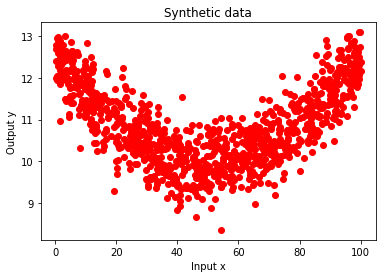

In [2]:
# Generate synthetic X/y data for Exercise 4

# Generate 1000 points x between 0 and 100
X = np.random.uniform(-0, 100, 1000).reshape((1000, 1))
X1 = np.concatenate((np.ones((1000, 1)), X), 1)

X_expanded = np.concatenate((X1,X1[:,1:]**2),1)

# Generate the "noisy" values of y for each X
theta_true = np.array([[12.5], [-0.1], [0.001]])

y = X_expanded @ theta_true + np.random.normal(0,0.5,(1000,1))

# Plot data
plt.plot(X1[:,1], y, 'ro')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data')
plt.show()

In [3]:
# Split data set into train and validation partitions
m = X.shape[0]
order = np.arange(m)
np.random.shuffle(order)
m_train = int(0.8 * m)
m_val = m - m_train
train_indices = order[:m_train]
val_indices = order[m_train:]
X_train = X[train_indices,:]
y_train = y[train_indices,:]
X_val = X[val_indices,:]
y_val = y[val_indices,:]

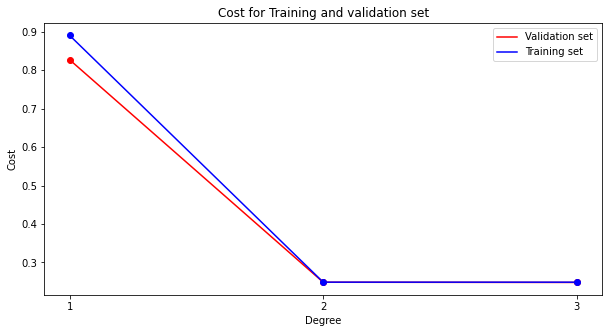

In [4]:
# construct the prediction function
def polyfeature(X, degree):
    poly = PolynomialFeatures(degree)
    X_exp = poly.fit_transform(X)
    return X_exp 

train_set = []
val_set = []
theta = []

for degree in range(3):
    m_train =  X_train.shape[0]
    m_val = X_val.shape[0]
    train_cost = 0
    val_cost = 0
    X_train_exp = polyfeature(X_train, degree+1)
    X_val_exp = polyfeature(X_val, degree+1)
    theta_star = np.linalg.inv(X_train_exp.T @ X_train_exp) @ X_train_exp.T @ y_train
    theta.append(theta_star.T) 
    
    # Calculate Traning cost
    for i in range (m_train):
        y_hat = X_train_exp[i:i+1,:] @ theta_star
        train_cost = train_cost + (y_hat - y_train[i,0])**2
    train_cost = train_cost/m_train
    train_set.append(train_cost[0,0])
    
     # Calculate Validation cost
    for j in range (m_val):
        y_hat = X_val_exp[j:j+1,:] @ theta_star
        val_cost = val_cost + (y_hat - y_val[j,0])**2
    val_cost = val_cost/m_val
    val_set.append(val_cost[0,0])

# Plot the cost
degree = [1,2,3]
plt.figure(figsize=(10, 5))
plt.title('Cost for Training and validation set')
plt.xlabel('Degree')
plt.ylabel('Cost')
plt.xticks(degree, degree)
plt.plot(degree,val_set,'r-', label='Validation set')
plt.plot(degree,train_set,'b-', label='Training set')
plt.plot(degree,val_set,'ro')
plt.plot(degree,train_set,'bo')
plt.legend()
plt.show()

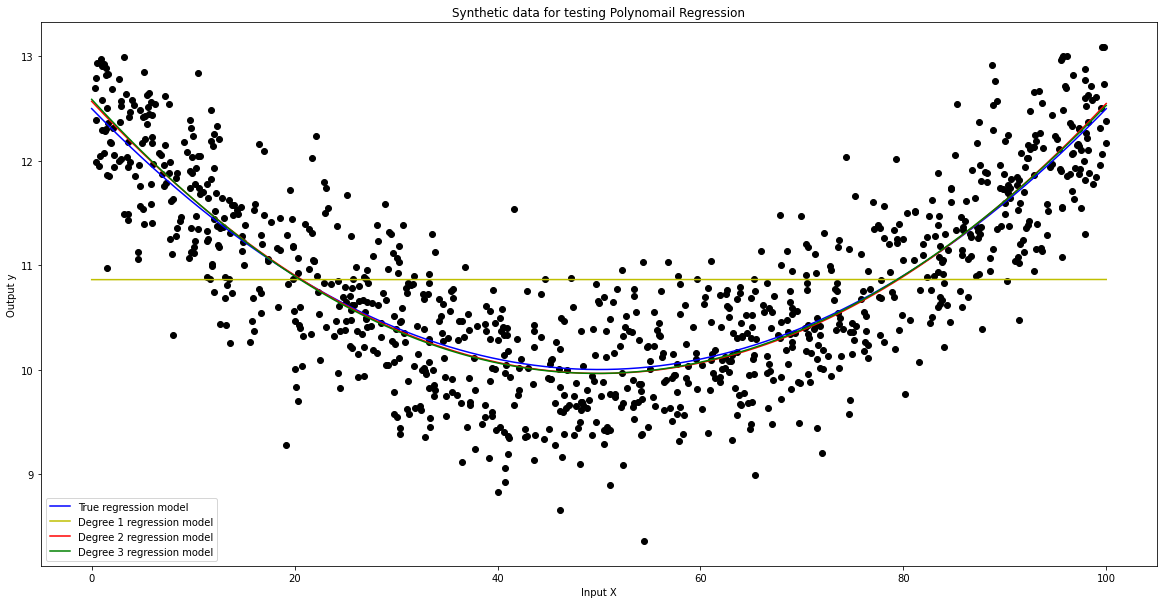

In [6]:
# Plot result
plt.figure(figsize=(20, 10))
X_plot = np.concatenate((np.ones((1000, 1)), X), 1)
plt.plot(X_plot[:,1], y, 'ko')

x_plot = np.arange(0, 100, 0.01).reshape((-1,1))
m_plot = x_plot.shape[0]

X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot, x_plot * x_plot), 1)
y_plot = X_plot @ theta_true
plt.plot(X_plot[:,1], y_plot, 'b-', label='True regression model')

X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot), 1)
y_plot = X_plot @ theta[0].T
plt.plot(X_plot[:,1], y_plot, 'y-', label='Degree 1 regression model')

X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot, x_plot**2), 1)
y_plot = X_plot @ theta[1].T
plt.plot(X_plot[:,1], y_plot, 'r-', label='Degree 2 regression model')

X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot, x_plot**2,x_plot**3), 1)
y_plot = X_plot @ theta[2].T
plt.plot(X_plot[:,1], y_plot, 'g-', label='Degree 3 regression model')

plt.legend()
plt.xlabel('Input X')
plt.ylabel('Output y')
plt.title('Synthetic data for testing Polynomail Regression')
plt.show()